Começamos importando as ferramentas necessárias para o nosso código.

numpy é a biblioteca de cálculo numérico.

matplotlib é a biblioteca necessária para mostrar os gráficos.

keras é uma api de aprendizado de máquina desenvolvida pelo google (está ligada ao tensorflow).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist #enorme banco de dados de digitos manuscritos
from sklearn.metrics import confusion_matrix # outra api de ml em python
import seaborn as sns # biblioteca para visualizacao estatistica no python

Vamos agora carregar o banco de dados da MNIST. Os dados já vem separados entre treino e teste. Isto é, parte deles será usado para treinar o modelo e a outra para verificar se o modelo treinado funciona adequadamente.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Podemos imprimir o formato do banco de dados para entender o que eles nos fornecem.

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Agora vamos mostrar como são os nossos dados.

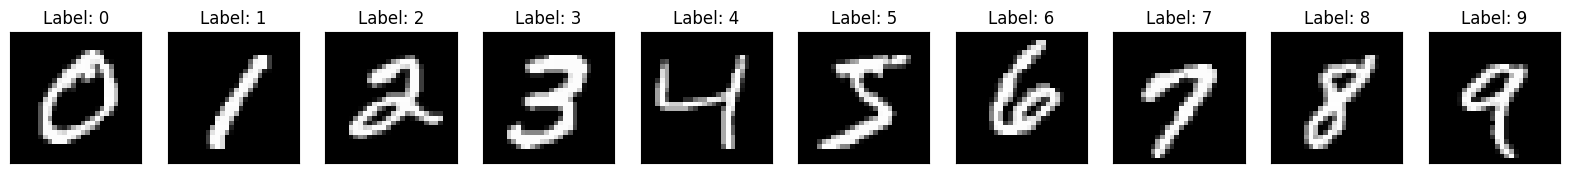

In [ ]:
# Vamos visualizar um exemplo para cada dígito usando um loop for e um subpplot matplotlib
num_classes = 10

# Cria um subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) # 1 linha, 10 colunas (num_classes)

# Loop através de 10 classes do dataset de treinamento e adiciona um label pra cada dataset de teste
for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label: {i}")
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)

Coloca as etiquetas dos dados (y_train e y_test) no formato one-hot. Basicamente se binariza as etiquetas para que keras consiga trabalhar de forma eficiente. Esta operação é realizada pelo comando 'to_categorical()'

In [ ]:
# Converte y_train no formato categórico
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

# Converte y_test no formato categórico
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

# Mostra como a forma do y_train e y_test mudou
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Aqui vamos visualisar a matriz de uma das imagens do dígitos manuscritos para entender como é o tipo da informação.

In [ ]:
# observem que os dados são matrizes 28x28 com valores inteiros entre 0 e 255
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Como a informação de cada figura varia entre 0 e 255 vamos normalizar as imagens dividindo tudo por 255. Depois testaremos para ver como a não normalização impacta na precisão.

In [ ]:
# normaliza as imagens
X_train = X_train/255
X_test = X_test/255

Finalmente podemos construir o nosso modelo de rede neural.

Aqui vamos usar o formato 'Sequential()' do keras com duas camadas escondidas, cada uma com 128 neurônios. Vamos usar também, só para testar em cada uma das camadas dois diferentes tipos de funções de ativação: relu e sigmoid. Note que a camada de entrada recebe um 'Flatten()' que basicamente transforma cada matriz em um vetor coluna.

In [ ]:
# Cria o modelo da rede neural
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Mostra um resumo da rede construída
model.summary()

# Define o otimizador, a função de perda (é o erro que se deseja minimizar) e a métrica de qualidade
model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Agora que o modelo está construído vamos treiná-lo!

In [ ]:
# treinando o modelo
BATCH_SIZE = 512
epochs = 10
model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs=epochs, validation_data=(X_test,y_test))

Epoch 1/10
118/118 [==============================] - 3s 20ms/step - loss: 0.8826 - acc: 0.7845 - val_loss: 0.3512 - val_acc: 0.9008
Epoch 2/10
118/118 [==============================] - 1s 13ms/step - loss: 0.3078 - acc: 0.9112 - val_loss: 0.2604 - val_acc: 0.9253
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2495 - acc: 0.9271 - val_loss: 0.2252 - val_acc: 0.9339
Epoch 4/10
118/118 [==============================] - 1s 13ms/step - loss: 0.2127 - acc: 0.9378 - val_loss: 0.1961 - val_acc: 0.9418
Epoch 5/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1854 - acc: 0.9458 - val_loss: 0.1697 - val_acc: 0.9493
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1626 - acc: 0.9519 - val_loss: 0.1558 - val_acc: 0.9541
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1438 - acc: 0.9581 - val_loss: 0.1425 - val_acc: 0.9574
Epoch 8/10
118/118 [==============================] - 3s 24ms/step - 

Agora vamos testar os resultados!

In [ ]:
# avaliando o treinamento e teste
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

# imprimindo os resultados
print(f"Perda do treino: {train_loss}, Acurácia do treino: {train_acc}")
print(f"Perda do teste: {test_loss}, Acurácia do teste: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1175 - acc: 0.9642
Perda do treino: 0.09810317307710648, Acurácia do treino: 0.9714333415031433
Perda do teste: 0.11748760938644409, Acurácia do teste: 0.9642000198364258


313/313 [==============================] - 1s 2ms/step


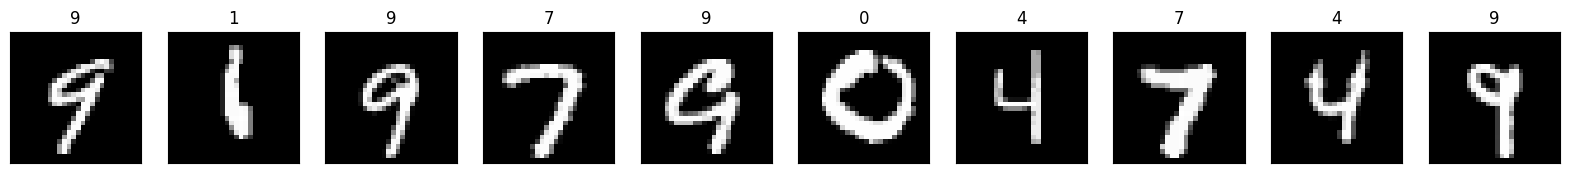

In [ ]:
# Vamos fazer umas previsões usando o nosso modelo treinado
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Mostra algumas previsões usando os dados de teste
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))

for i in range(10):
  random_num = np.random.choice(len(X_test))
  axes[i].set_title(predictions[random_num])
  axes[i].imshow(X_test[random_num], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

Uma forma de visualizarmos a precisão do nosso modelo usamos a matriz de confusão

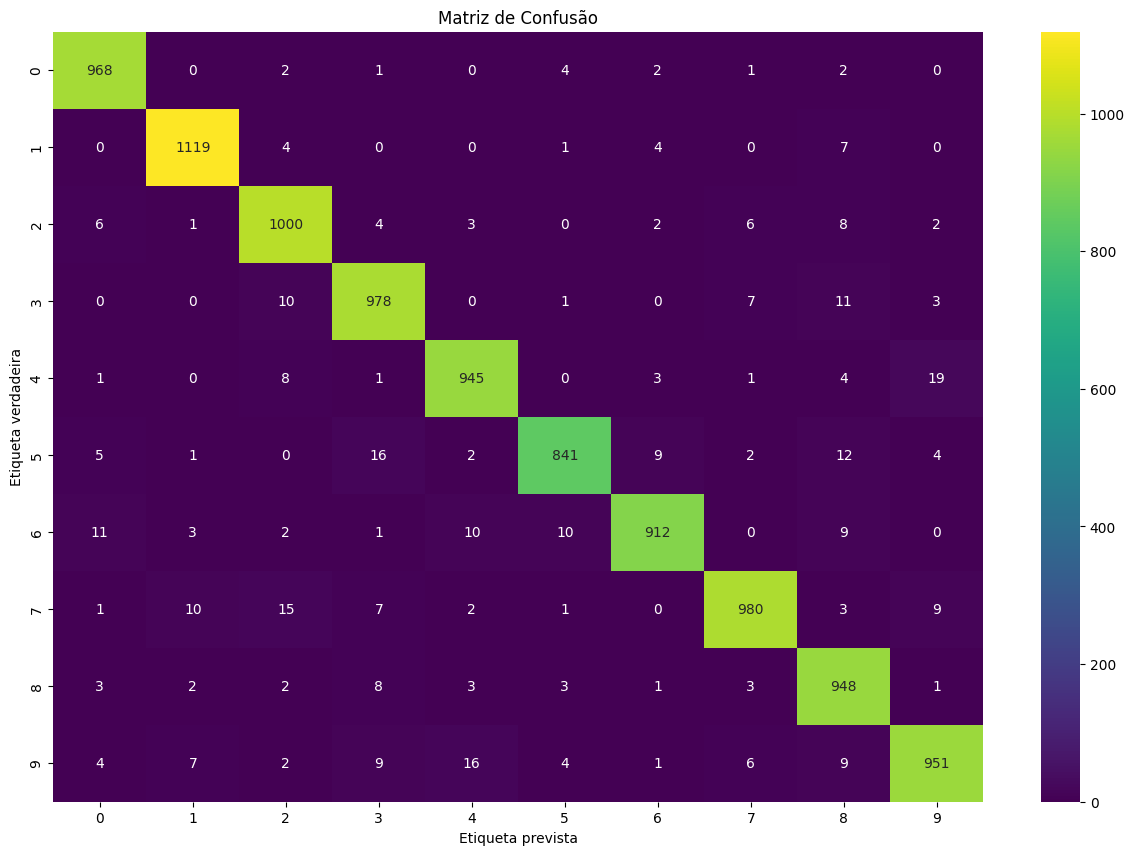

In [ ]:
# Gera a matriz de confusão
confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), predictions)

# Plota a matriz de confusão
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Etiqueta prevista")
ax.set_ylabel("Etiqueta verdadeira")
ax.set_title("Matriz de Confusão");